### Text Mining
- 비정형 텍스트 데이터에서 의미를 추출하는 작업
- 자연어처리 기술을 접목해서 최근에 많이 진행되고 있다
    - (자연어처리 NLP: 사람의 언어를 컴퓨터가 이해할 수 있도록 연구하는 학문)

### 1. 단어빈도 분석
- 워드카운트 : 단어의 빈도를 측정하여 분석

### 데이터 수집 및 로딩
- 스마일게이트의 한국어 혐오표현 데이터 셋 활용

In [167]:
import pandas as pd
import numpy as np

# tsv 파일 로딩
train = pd.read_csv('data/unsmile_train_v1.0.tsv', sep='\t', encoding='utf-8')
train

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. 10 16까지 IQ 떨어지고 출산 위험은 400% 다.,0,0,0,0,0,0,1,0,0,0,0
2,"루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵곡임 꼭 들어보셈""",0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽에서 고소 가능하냐?,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런다! 이렇게 2개로 싸우냐.. 내가 볼 땐 둘다 나쁜 말 그 이상도 이하도 아닌데,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15000,께롱께롱께롱!!!,0,0,0,0,0,0,0,0,0,1,0
15001,갱상도가아니라 홍어지 개좃같은 홍어년들,0,0,0,0,0,1,0,0,0,0,0
15002,말레이시아랑 인도네시아 여자 존나 못생겼던데,1,0,0,1,0,0,0,0,0,0,0
15003,링크도 안박고 가서 글 쓰자고 선동하네,0,0,0,0,0,0,0,0,1,0,0


In [168]:
test = pd.read_csv('data/unsmile_valid_v1.0.tsv', sep='\t', encoding='utf-8')
test

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,ㅇㄱㄹㅇ 진짜 죽어도 상관없다는 마인드로 싸웠더니 지금 서열 상타취노 식칼들고 니가 나 안찌르면 내가 너 찌른다 했더니 애비충 냄동충 알아서기노 ^됫^ 한번 서열 잡고 그 담에 개길때마다 더 세게나가면 확실하게 짓누를수있다익이,0,1,0,0,0,0,0,0,0,0,0
1,여자들은 취미가 애낳는건가.. 취미를 좀 가져라,1,0,0,0,0,0,0,0,0,0,0
2,개슬람녀 다 필요없고 니 엄마만 있으면 된다,0,0,0,1,0,0,1,0,0,0,0
3,조팔ㅋㅋ 남한 길거리 돌아다니면 한국남자때문에 눈재기하는데 그걸 내 폰에 굳이 담아야하노 조팔ㅋㅋ,0,1,0,0,0,0,0,0,0,0,0
4,바지 내리다 한남들 와꾸 보고 올려뿟노,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3732,저게 시대적언어면 한남충도 시대적언어 아니노 ㅋㅋ,0,1,0,0,0,0,0,0,0,0,0
3733,다른것보다 눈이 어떻게 저렇게 생기노.탄식.,0,0,0,0,0,0,0,0,1,0,0
3734,막노동을 해도 한국에살고말지 미쳤다고 남미를가냐?차라리 자살을하겠다.,0,0,0,1,0,0,0,0,0,0,0
3735,‘사형을 구형하였으나 여성인 점을 감안해 25년 선고’ ???내가 뭐 잘못본건가?개시발 보지민국 보빨새끼들,1,0,0,0,0,0,0,0,0,0,0


In [169]:
train['문장']

0                                                                                      일안하는 시간은 쉬고싶어서 그런게 아닐까
1                                아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. 10 16까지 IQ 떨어지고 출산 위험은 400% 다.
2                                                    루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o  doin 진짜 띵곡임 꼭 들어보셈"
3                                                   홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽에서 고소 가능하냐?
4                 아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런다! 이렇게 2개로 싸우냐.. 내가 볼 땐 둘다 나쁜 말 그 이상도 이하도 아닌데
                                                         ...                                                 
15000                                                                                               께롱께롱께롱!!!
15001                                                                                   갱상도가아니라 홍어지 개좃같은 홍어년들
15002                                                                                말레이시아랑 인도네시아 여자 존나 못생겼던데
15003     

In [170]:
import os
os.getcwd()

'C:\\Users\\USER\\Documents\\GitHub\\aischoolpython\\machineLearning'

In [171]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


In [172]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3737 entries, 0 to 3736
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      3737 non-null   object
 1   여성/가족   3737 non-null   int64 
 2   남성      3737 non-null   int64 
 3   성소수자    3737 non-null   int64 
 4   인종/국적   3737 non-null   int64 
 5   연령      3737 non-null   int64 
 6   지역      3737 non-null   int64 
 7   종교      3737 non-null   int64 
 8   기타 혐오   3737 non-null   int64 
 9   악플/욕설   3737 non-null   int64 
 10  clean   3737 non-null   int64 
 11  개인지칭    3737 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 350.5+ KB


### 특정 혐오표현에서 많이 사용되는 단어를 확인하고 시각화해보기

In [173]:
# 지역을 혐오하는 문장 추출
text_train = train['문장' ][train['지역']==1]

In [174]:
text_train

6        예수 십새끼 개새끼 창녀아들 애비실종 가정교육 못받은 무뇌충 허언증 정신병자 사기꾼 망상 근본없는 병신 장애인 짱개 흑인 이슬람 전라도랑 동급
25                                                                  홍어무침 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
28                                                                          홍들 피들 폭들 ㅎㅎㅎ
35                                                                               이새끼 전라도
37                                                                          진짜 전라도 존나 싫다
                                              ...                                       
14956                                                                             경상도새끼네
14975                                 7시말은 왜이렇게 듣기가 싫냐. 식당 같은데 가서도 전라도 말 들리면 신경 엄청 곤두선다.
14979                                                    왜 재밌겠는데 뭘 섬라도 쪽 꿀잼뉴스 공중제비하고 보겠네
14998                                                               전라디언은 뇌구조가 다르게 태어난당께
15001                                                              갱상도가아니라 홍어지 개좃같은 홍어년들
Name: 문장, Length: 105

In [175]:
# 띄어쓰기 중심 토큰화 : nltk 패키지 활용
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [176]:
word_tokenize

<function nltk.tokenize.word_tokenize(text, language='english', preserve_line=False)>

In [177]:
list(text_train.values)

['예수 십새끼 개새끼 창녀아들 애비실종 가정교육 못받은 무뇌충 허언증 정신병자 사기꾼 망상 근본없는 병신 장애인 짱개 흑인 이슬람 전라도랑 동급',
 '홍어무침 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '홍들 피들 폭들 ㅎㅎㅎ',
 '이새끼 전라도',
 '진짜 전라도 존나 싫다',
 '전라도피는 물보다 진하다',
 '이거 jtbc나 한경오에 제보하면 댓글로 대구 개까이겠지?',
 '대구븅신들',
 '가까운 신안으로 보낸다. 세상 그 누구도 찾지못한다',
 '전라도세끼들은 딱봐도 뭔가 혐오감있게 생김 유전자가 다른 종족인건 확실함',
 '인천은 진짜 수도권인데 제일 싼듯 요즘 안산부천 이딴 쓰레기동네 다오르는데 인천은 방어하는듯',
 '경상도친구장점내가 존나 지적하고 꼽주고해도 다들어줌',
 '근대 7시는 전두환각하가 미워서 그러는거냐? 아니면 진심으로 머중이를 존경하는거냐?존나 궁금함',
 'ㅇㅈ 짱구 드래곤볼 심지어지금도 넷플에서 애니보면서 반일하는 절라도는 자살 ㄱ',
 '대구게이는 일베 글쓰지 마라 IP타고 우한폐렴 전파된다',
 '그래서 신도시 맘충년들이 유독 진성맘충년들인데 그 중에서도 맘충대장이 동탄맘년들임.',
 '라도도 쌍도를 부라워함',
 '우린 전라도 있어서 튀기새끼들한테 질 일 없다',
 '한국의 브라질 = 대구 한국의 멕시코 = 전라도한국의 인도 = 부산',
 '진압당하고 쳐발리면 홍통일체라며 양비론으로 해버리고 날라버림, 졸렬한 홍어새끼들 ㅋㅋ',
 '대구" ㄷㄷㄷ',
 '경상도 - ....경기도 - ...강원도! - ...충청도!! 멍청도! - ...?전..ㄹ.. - 젓갈로 만들어버릴까잉',
 '저 맘충도 결국은 광주인데 정부에서 안 보호해주냐??',
 '전라도에 대중목욕탕 졸라많다',
 '왜 이슈지 ㅋㅋ 쌍도가 쌍도지 그럼 뭐라해 씨팔',
 '개슬람=전라도 반박시 홍어인정',
 '대구에 메갈퇘지보지가 젤 만ㅎ다는건 정설 아니노',
 '전라년들은 똥그멍에 쑤셔야됨ㅇㅇ 그라야 복종함 내가 전라도 광주다 ㅅㅂㅎㅎㅅ',
 '개만도못한 전라도 시바

In [178]:
# 띄어쓰기 중심 토큰화 : python 기본 함수 활용
area_tokens = [t for doc in text_train for t in doc.split()]

In [179]:
area_tokens

['예수',
 '십새끼',
 '개새끼',
 '창녀아들',
 '애비실종',
 '가정교육',
 '못받은',
 '무뇌충',
 '허언증',
 '정신병자',
 '사기꾼',
 '망상',
 '근본없는',
 '병신',
 '장애인',
 '짱개',
 '흑인',
 '이슬람',
 '전라도랑',
 '동급',
 '홍어무침',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '홍들',
 '피들',
 '폭들',
 'ㅎㅎㅎ',
 '이새끼',
 '전라도',
 '진짜',
 '전라도',
 '존나',
 '싫다',
 '전라도피는',
 '물보다',
 '진하다',
 '이거',
 'jtbc나',
 '한경오에',
 '제보하면',
 '댓글로',
 '대구',
 '개까이겠지?',
 '대구븅신들',
 '가까운',
 '신안으로',
 '보낸다.',
 '세상',
 '그',
 '누구도',
 '찾지못한다',
 '전라도세끼들은',
 '딱봐도',
 '뭔가',
 '혐오감있게',
 '생김',
 '유전자가',
 '다른',
 '종족인건',
 '확실함',
 '인천은',
 '진짜',
 '수도권인데',
 '제일',
 '싼듯',
 '요즘',
 '안산부천',
 '이딴',
 '쓰레기동네',
 '다오르는데',
 '인천은',
 '방어하는듯',
 '경상도친구장점내가',
 '존나',
 '지적하고',
 '꼽주고해도',
 '다들어줌',
 '근대',
 '7시는',
 '전두환각하가',
 '미워서',
 '그러는거냐?',
 '아니면',
 '진심으로',
 '머중이를',
 '존경하는거냐?존나',
 '궁금함',
 'ㅇㅈ',
 '짱구',
 '드래곤볼',
 '심지어지금도',
 '넷플에서',
 '애니보면서',
 '반일하는',
 '절라도는',
 '자살',
 'ㄱ',
 '대구게이는',
 '일베',
 '글쓰지',
 '마라',
 'IP타고',
 '우한폐렴',
 '전파된다',
 '그래서',
 '신도시',
 '맘충년들이',
 '유독',
 '진성맘충년들인데',
 '그',
 '중에서도',
 '맘충대장이',
 '동탄맘년들임.',
 '라도도',
 '쌍도를',
 '부라워함',
 '우린',
 '전라도'

In [180]:
# 단어 빈도수 계산
from collections import Counter

area_counter = Counter(area_tokens)
area_counter

Counter({'전라도': 130,
         '홍어': 48,
         '존나': 40,
         '진짜': 39,
         '경상도': 38,
         '새끼들': 33,
         '다': 33,
         'ㅋㅋㅋ': 30,
         'ㅋㅋ': 29,
         '전라도는': 27,
         '쌍도': 26,
         '더': 26,
         '=': 25,
         '개쌍도': 20,
         '왜': 19,
         '씨발': 19,
         '시발': 18,
         '서울': 18,
         '그': 17,
         'ㄹㅇ': 16,
         '이': 15,
         '전라도가': 15,
         '사는': 15,
         '저': 14,
         '역시': 14,
         '.': 14,
         '제일': 13,
         '라도': 13,
         '홍어들': 13,
         '그냥': 13,
         '대구': 12,
         '일베': 12,
         '홍어가': 12,
         '보면': 12,
         '+': 12,
         '있는': 11,
         '좀': 11,
         '뭐': 11,
         '홍어새끼들': 10,
         '전라도에': 10,
         '같은': 10,
         '하는': 10,
         '새끼들이': 10,
         '걍': 10,
         '무슨': 10,
         '수': 10,
         '멍청도': 10,
         '또': 10,
         '근데': 10,
         '부산': 9,
         '-': 9,
         '안': 9,
         '내

In [181]:
area_counter.most_common(40)

[('전라도', 130),
 ('홍어', 48),
 ('존나', 40),
 ('진짜', 39),
 ('경상도', 38),
 ('새끼들', 33),
 ('다', 33),
 ('ㅋㅋㅋ', 30),
 ('ㅋㅋ', 29),
 ('전라도는', 27),
 ('쌍도', 26),
 ('더', 26),
 ('=', 25),
 ('개쌍도', 20),
 ('왜', 19),
 ('씨발', 19),
 ('시발', 18),
 ('서울', 18),
 ('그', 17),
 ('ㄹㅇ', 16),
 ('이', 15),
 ('전라도가', 15),
 ('사는', 15),
 ('저', 14),
 ('역시', 14),
 ('.', 14),
 ('제일', 13),
 ('라도', 13),
 ('홍어들', 13),
 ('그냥', 13),
 ('대구', 12),
 ('일베', 12),
 ('홍어가', 12),
 ('보면', 12),
 ('+', 12),
 ('있는', 11),
 ('좀', 11),
 ('뭐', 11),
 ('홍어새끼들', 10),
 ('전라도에', 10)]

In [182]:
from wordcloud import WordCloud
# 객체생성, 한글 폰트 지정
wc = WordCloud(background_color='white', width=800, height=800, random_state=715, font_path='C:/Windows/Fonts/malgun.ttf')

In [183]:
wc

In [184]:
# 빈도수를 이용해서 워드클라우드 생성
wc.generate_from_text(' '.join(area_tokens))


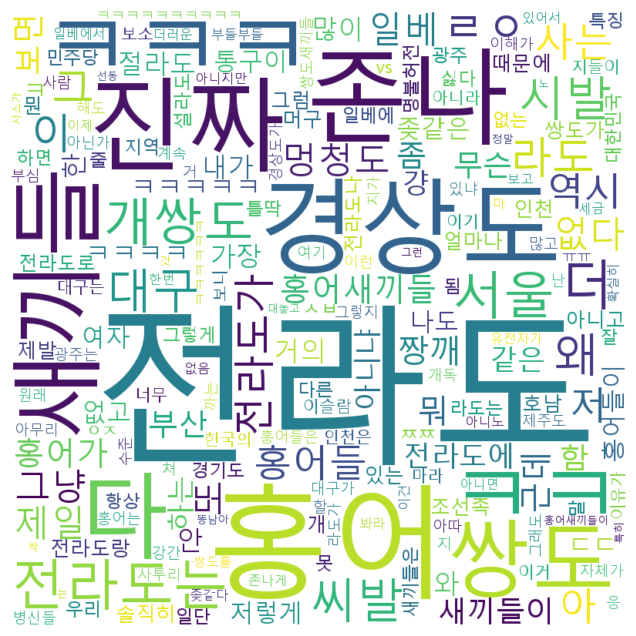

In [185]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('data/지역혐오.png')
plt.show()

 ### 2. 감성분석
 

### 데이터 전처리
- ㅋㅋㅋㅋ, ㅎㅎㅎ 같은 정해진 횟수 없이 반복되는 글자 삭제 -> 정규표현식
- 한 글자 단어 삭제(의미 부여가 어려운 단어라고 가정)

### 정규표현식(Regular Expression)
- 특정한 패턴(규칙)을 가진 문자열의 집합을 표현하는 언어
- 핸드폰번호나 이메일처럼 패턴이 있는 문자열의 검색과 치환을 위해 프로그래밍 언어에서 대부분 지원하고 있음

### 혐오표현 데이터 클렌징

In [186]:
from tqdm import tqdm # 반복 횟수 예상 시간 계산 및 시각화
import re

# 패턴생성
p = re.compile("[ㅋㅎㄷㅇ~!?.\\-ㅡ;0-9a-zA-Z]+") # + : 앞의 문자가 한 개 이상 존재

train_clean = [] # 전처리된 전체 텍스트를 담을 리스트

for doc in tqdm(train['문장']): # 약 1만 5천번 반복
    temp = [] # 클렌징한 문장의 토큰들이 들어갈 리스트 
    for token in doc.split(): # 문장을 띄어쓰기로 토큰화
       if len(token) < 2: # 1글자 제거
           continue
       if p.search(token): # 정규표현식 패턴에 매칭되는지 확인
              continue
       temp.append(token)
    train_clean.append(' '.join(temp)) # 토큰화된 문장을 다시 띄어쓰기로 결합하여 리스트에 추가
            

100%|██████████| 15005/15005 [00:00<00:00, 70762.42it/s]


In [187]:
train_clean

['일안하는 시간은 쉬고싶어서 그런게 아닐까',
 '아동성범죄와 페도버는 기록바 끊어져 영원히 고통 무슬림 떨어지고 출산 위험은',
 '루나 솔로앨범 나왔을 때부터 머모 기운 있었음 진짜 띵곡임 들어보셈"',
 '홍팍에도 어버이연합인가 보내요 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽에서 고소',
 '아놔 여기 댓들은 여자들이 김치녀라고 먼저 여자들은 심하게 이렇게 내가 둘다 나쁜 이상도 이하도 아닌데',
 '고향가서 피방가면 동네 부럴 친구들이랑은 거르는 없이 이야기하니까 말하게 되더라 당연히 키보드를 치거나 그러지는 않는데 말하는게 많이 거칠어지긴 반성해야겠네',
 '예수 십새끼 개새끼 창녀아들 애비실종 가정교육 못받은 무뇌충 허언증 정신병자 사기꾼 망상 근본없는 병신 장애인 짱개 흑인 이슬람 전라도랑 동급',
 '나이쳐먹고 피시방가는 놈들은 대가리에 똥만찬 놈들임',
 '출산청같은 우리나라 계집들 의무적으로 군대보내면 해결될 정신개조부터 지할꺼 다하고 무슨 애를 낳고 무슨 자식교육을',
 '재능 ㅂㅅㅌㅊ노 합성배우고싶다이기',
 '가짜 남자는 어떻게',
 '이슬람뺨치내',
 '어린이집에 월요일에 데려다주고 금요일에 데리고 가슴이 너무 아가가 얼마나',
 '갓슬람 정희구현 테러 ㅅㅅㅅㅅ미제양키새끼들에게는 테러가 답이다좆같은 양키 씨발새끼들',
 '따고 넘어갔나보네',
 '리더십, 메시지로 내부 결속을 강화하고 외부로 이미지를 구축하여 다시 교회로 모일수 있기를 소망하고 기도합니다',
 '협박스킬은 패시브랑께',
 '위로와 격려를 호텔에서 저여자도 정상은 아니구만 완전 지네 할아버지보다 나이가 많을듯한데 둘다 그렇게 더러운짓은 하고 설교를 어떻게',
 '메틸 알콜 집에서 쓰고 질문 에틸에 메틸 공업용 에틸 알콜은 면세라 불법적으로 술제조 때문에 정도 메틸이 들어가면서 제조방지용으로',
 '띄울사람이 진짜 없긴 없나보다',
 '한국패미=고유정 수준',
 '구구절절 팩트',
 '빼고 아무것도 없는 개돼지 정권이노 탄핵 개힘조',
 '진짜 저것들 아주 싫다

In [188]:
from tqdm import tqdm # 반복 횟수 예상 시간 계산 및 시각화
import re

# 패턴생성
p = re.compile("[ㅋㅎㄷㅇ~!?.\\-ㅡ;0-9a-zA-Z]+") # + : 앞의 문자가 한 개 이상 존재

test_clean = [] # 전처리된 전체 텍스트를 담을 리스트

for doc in tqdm(test['문장']): # 약 1만 5천번 반복
    temp = [] # 클렌징한 문장의 토큰들이 들어갈 리스트 
    for token in doc.split(): # 문장을 띄어쓰기로 토큰화
       if len(token) < 2: # 1글자 제거
           continue
       if p.search(token): # 정규표현식 패턴에 매칭되는지 확인
              continue
       temp.append(token)
    test_clean.append(' '.join(temp)) # 토큰화된 문장을 다시 띄어쓰기로 결합하여 리스트에 추가

100%|██████████| 3737/3737 [00:00<00:00, 77856.72it/s]


In [189]:
test_clean

['진짜 죽어도 상관없다는 마인드로 싸웠더니 지금 서열 상타취노 식칼들고 니가 안찌르면 내가 찌른다 했더니 애비충 냄동충 알아서기노 ^됫^ 한번 서열 잡고 담에 개길때마다 세게나가면 확실하게 짓누를수있다익이',
 '여자들은 취미가 취미를 가져라',
 '개슬람녀 필요없고 엄마만 있으면 된다',
 '남한 길거리 돌아다니면 한국남자때문에 눈재기하는데 그걸 폰에 굳이 담아야하노',
 '바지 내리다 한남들 와꾸 보고 올려뿟노',
 '저새끼 슈스케나온새끼잖아',
 '모든 이슬람이 테러리스트는 아니지만 모든 테러리스트는 자유민주국가에서 테러분자 감시는 텄고요, 막는게 최선',
 '역시 (절레절레)',
 '그만해라 틀딱새끼들 달려와서 좆족으로 몰아간다 이제',
 '잘생긴 형같음절대로 여자로 안보임',
 '여성혐오도 아니고 상식 비상식의 저게 한국사회의 약이되는거지 독이 될거라고 생각하는건 대가리좀 깨라',
 '오히려 태평양 패권을 두고 싸운 일본넘들이 두렵게 느껴지는게 정상인데',
 '전라도 통수쩌는 위선자들',
 '두번째는 펨섭이라그래',
 '민주화보소',
 '동성애로 인해 에이즈질환이 급증했는데 본인한테도 피해 타인한테도 동성애는 분명한 죄, 회개하지 않으면 멸망한다고 하나님이',
 '림종석 림수경 수상하지',
 '팩트라 반박은 하고 부들대는 김치좆 답노',
 '저런 불만이 있을테니 외국인들 자동가입 안되게해서 보험료 적용 못받게 해야지 그래야 감기나 배탈로 병원갔다가 병원비랑 약값 보고 식겁해 공단 뛰어가 가입시켜달라고',
 '재크 나이프 하니까 진중곤이 생각나네요',
 '으이고,,누가 그러케 걸래같이 놀리렛나요 남자는 이래서 조신헤야함니다',
 '유튜브 캡쳐 팩트이게 일베저장소 수준',
 '똥남아 다운화 다추방해라 진짜 자지새끼들 딸딸이나치지 없는형편에 아무구멍에라도 박아보겠다고 똥남아새끼들 수입해와서 박아대고 좆같네진짜 씹새끼들',
 '야이 점쟁이새끼야 더러운글 그만올리고점사나 잘봐라',
 '친구먹자 아무것도 하지 않고 썩은 고기나 찾는 하이에나 부대나 인정해라, 

### 형태소 분석

In [190]:
# mecab_path = '../Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab_light_220429.sh'
# 
# # 형태소 분석기 설치
# !bash {mecab_path}


In [191]:

from konlpy.tag import Okt, Kkma
from eunjeon import Mecab



mecab = Mecab()
okt = Okt()
kkma = Kkma()


In [192]:
# 형태소로 분리
okt.morphs('아버지가 방에 들어가신다.')

['아버지', '가', '방', '에', '들어가신다', '.']

In [193]:
okt.morphs('아버지 가방에 들어가신다.')

['아버지', '가방', '에', '들어가신다', '.']

In [194]:
# 분리된 형태소와 품사 확인
okt.pos('아버지가 방에 들어가신다.')

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb'),
 ('.', 'Punctuation')]

In [195]:
okt.pos('어제는 저녁을 맛있게 먹었다~! ㅋㅋㅋㅋㅋㅋㅋ,', norm=True)

[('어제', 'Noun'),
 ('는', 'Josa'),
 ('저녁', 'Noun'),
 ('을', 'Josa'),
 ('맛있게', 'Adjective'),
 ('먹었다', 'Verb'),
 ('~!', 'Punctuation'),
 ('ㅋㅋㅋ', 'KoreanParticle'),
 (',', 'Punctuation')]

In [196]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [197]:
okt.nouns('어제는 저녁을 맛있게 먹었다.')

['어제', '저녁']

In [198]:
kkma.morphs('아버지가 방에 들어가신다.')

['아버지', '가', '방', '에', '들어가', '시', 'ㄴ다', '.']

In [199]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [200]:
# 이모티콘 처리
import emoji

In [201]:
train_clean_list = []

for doc in tqdm(train_clean):
    emoji_rv =emoji.replace_emoji(doc)
    train_clean_list.append(emoji_rv)
    

100%|██████████| 15005/15005 [00:01<00:00, 9904.73it/s] 


In [202]:
test_celean_list = []

for doc in tqdm(test_clean):
    emoji_rv =emoji.replace_emoji(doc)
    test_celean_list.append(emoji_rv)

100%|██████████| 3737/3737 [00:00<00:00, 11444.97it/s]


In [203]:
# # 클렌징한 데이터(이모티콘 제거)를 형태소 단위로 분리
# konlpy_morphs_train = []
# for doc in tqdm(train_clean_list):
#     rs = kkma.morphs(doc)
#     konlpy_morphs_train.append(rs)


In [204]:
# konlpy_morphs_train

In [205]:
# kiwipiepy 한국어 형태소 분석 라이브러리
# C++ 기반의 라이브러리로 속도가 빠름
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [206]:
kiwi.tokenize('아버지 가방에 들어가신다.')

[Token(form='아버지', tag='NNG', start=0, len=3),
 Token(form='가방', tag='NNG', start=4, len=2),
 Token(form='에', tag='JKB', start=6, len=1),
 Token(form='들어가', tag='VV', start=8, len=3),
 Token(form='시', tag='EP', start=11, len=1),
 Token(form='ᆫ다', tag='EF', start=11, len=2),
 Token(form='.', tag='SF', start=13, len=1)]

### 불용어처리(stop words)
- 분석 시 필요 없는, 의미가 없는 토큰들을 제거하는 행위
- 불용어 사전을 활용하여 제거

In [207]:
from kiwipiepy.utils import Stopwords

stopwords = Stopwords()


In [208]:
# 새로운 불용어 등록
stopwords.add(("결과","NNG"))

In [209]:
kiwi.tokenize("분석 결과에서 불용어만 제외하고 출력할 수도 있다.", stopwords=stopwords)

[Token(form='분석', tag='NNG', start=0, len=2),
 Token(form='불', tag='NNG', start=8, len=1),
 Token(form='용어', tag='NNG', start=9, len=2),
 Token(form='제외', tag='NNG', start=13, len=2),
 Token(form='출력', tag='NNG', start=18, len=2),
 Token(form='있', tag='VA', start=25, len=1)]

### 띄어쓰기 교정

In [210]:
train_clean_list

['일안하는 시간은 쉬고싶어서 그런게 아닐까',
 '아동성범죄와 페도버는 기록바 끊어져 영원히 고통 무슬림 떨어지고 출산 위험은',
 '루나 솔로앨범 나왔을 때부터 머모 기운 있었음 진짜 띵곡임 들어보셈"',
 '홍팍에도 어버이연합인가 보내요 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽에서 고소',
 '아놔 여기 댓들은 여자들이 김치녀라고 먼저 여자들은 심하게 이렇게 내가 둘다 나쁜 이상도 이하도 아닌데',
 '고향가서 피방가면 동네 부럴 친구들이랑은 거르는 없이 이야기하니까 말하게 되더라 당연히 키보드를 치거나 그러지는 않는데 말하는게 많이 거칠어지긴 반성해야겠네',
 '예수 십새끼 개새끼 창녀아들 애비실종 가정교육 못받은 무뇌충 허언증 정신병자 사기꾼 망상 근본없는 병신 장애인 짱개 흑인 이슬람 전라도랑 동급',
 '나이쳐먹고 피시방가는 놈들은 대가리에 똥만찬 놈들임',
 '출산청같은 우리나라 계집들 의무적으로 군대보내면 해결될 정신개조부터 지할꺼 다하고 무슨 애를 낳고 무슨 자식교육을',
 '재능 ㅂㅅㅌㅊ노 합성배우고싶다이기',
 '가짜 남자는 어떻게',
 '이슬람뺨치내',
 '어린이집에 월요일에 데려다주고 금요일에 데리고 가슴이 너무 아가가 얼마나',
 '갓슬람 정희구현 테러 ㅅㅅㅅㅅ미제양키새끼들에게는 테러가 답이다좆같은 양키 씨발새끼들',
 '따고 넘어갔나보네',
 '리더십, 메시지로 내부 결속을 강화하고 외부로 이미지를 구축하여 다시 교회로 모일수 있기를 소망하고 기도합니다',
 '협박스킬은 패시브랑께',
 '위로와 격려를 호텔에서 저여자도 정상은 아니구만 완전 지네 할아버지보다 나이가 많을듯한데 둘다 그렇게 더러운짓은 하고 설교를 어떻게',
 '메틸 알콜 집에서 쓰고 질문 에틸에 메틸 공업용 에틸 알콜은 면세라 불법적으로 술제조 때문에 정도 메틸이 들어가면서 제조방지용으로',
 '띄울사람이 진짜 없긴 없나보다',
 '한국패미=고유정 수준',
 '구구절절 팩트',
 '빼고 아무것도 없는 개돼지 정권이노 탄핵 개힘조',
 '진짜 저것들 아주 싫다

In [211]:
kiwi.space("띄어쓰기없이작성된문장을띄어쓰기로교정할수있 다.")

'띄어쓰기 없이 작성된 문장을 띄어쓰기로 교정할 수 있다.'

In [212]:
train_sc_list =[]
for doc in tqdm(train_clean_list):
    space_doc = kiwi.space(doc)
    train_sc_list.append(space_doc)


100%|██████████| 15005/15005 [00:32<00:00, 460.38it/s]


In [213]:
test_sc_list =[]
for doc in tqdm(test_celean_list):
    space_doc = kiwi.space(doc)
    test_sc_list.append(space_doc)

100%|██████████| 3737/3737 [00:09<00:00, 391.66it/s]


In [214]:
train_sc_list

['일 안 하는 시간은 쉬고 싶어서 그런 게 아닐까',
 '아동 성범죄와 페도 버는 기록 바 끊어져 영원히 고통 무슬림 떨어지고 출산 위험은',
 '루나 솔로 앨범 나왔을 때부터 머모 기운 있었음 진짜 띵 곡임 들어 보셈"',
 '홍팍에도 어버이 연합인가 보내요 이런 뎃 글 있는데 이거 어버이 연합 측에 신고하면 그 쪽에서 고소',
 '아놔 여기 댓들은 여자들이 김치 녀라고 먼저 여자들은 심하게 이렇게 내가 둘 다 나쁜 이상도 이하도 아닌데',
 '고향 가서 피 방 가면 동네 부럴 친구들이랑은 거르는 없이 이야기하니까 말하게 되더라 당연히 키보드를 치거나 그러지는 않는데 말하는 게 많이 거칠어지긴 반성해야겠네',
 '예수 십 새끼 개새끼 창녀 아들 애비 실종 가정교육 못 받은 무뇌충 허언증 정신병자 사기꾼 망상 근본 없는 병신 장애인 짱개 흑인 이슬람 전라도랑 동급',
 '나이 쳐 먹고 피시방 가는 놈들은 대가리에 똥만 찬 놈들임',
 '출산 청 같은 우리 나라 계집들 의무적으로 군대 보내면 해결될 정신 개조부터 지 할 꺼 다 하고 무슨 애를 낳고 무슨 자식 교육을',
 '재능 ㅂㅅㅌㅊ노 합성 배우고 싶다이기',
 '가짜 남자는 어떻게',
 '이슬람 뺨치 내',
 '어린이집에 월요일에 데려다 주고 금요일에 데리고 가슴이 너무 아가가 얼마나',
 '갓 슬람 정희 구현 테러 ㅅㅅㅅㅅ미제 양키 새끼들에게는 테러가 답이 다 좆같은 양키 씨발 새끼들',
 '따고 넘어갔나 보네',
 '리더십, 메시지로 내부 결속을 강화하고 외부로 이미지를 구축하여 다시 교회로 모일 수 있기를 소망하고 기도합니다',
 '협박 스킬은 패시브랑께',
 '위로와 격려를 호텔에서 저 여자도 정상은 아니구만 완전 지네 할아버지보다 나이가 많을 듯한데 둘 다 그렇게 더러운 짓은 하고 설교를 어떻게',
 '메틸 알콜 집에서 쓰고 질문 에틸에 메틸 공업용 에틸 알콜은 면세라 불법적으로 술 제조 때문에 정도 메틸이 들어가면서 제조 방지용으로',
 '띄울 사람이 진짜 없긴 없나 보다',
 '한국 패 미=고

In [215]:
test_sc_list

['진짜 죽어도 상관없다는 마인드로 싸웠더니 지금 서열 상타취노 식칼 들고 니가 안 찌르면 내가 찌른다 했더니 애비충 냄동충 알아서기노 ^됫 ^ 한번 서열 잡고 담에 개길 때마다 세게 나가면 확실하게 짓누를 수 있다 익이',
 '여자들은 취미가 취미를 가져라',
 '개슬람녀 필요 없고 엄마만 있으면 된다',
 '남한 길거리 돌아다니면 한국 남자 때문에 눈 재기하는데 그걸 폰에 굳이 담아야하노',
 '바지 내리 다 한 남들 와꾸 보고 올려뿟노',
 '저 새끼 슈스케 나온 새끼잖아',
 '모든 이슬람이 테러리스트는 아니지만 모든 테러리스트는 자유 민주 국가에서 테러 분자 감시는 텄고요, 막는 게 최선',
 '역시 (절레절레)',
 '그만 해라 틀 딱 새끼들 달려와서 좆 족으로 몰아간다 이제',
 '잘생긴 형 같음 절대로 여자로 안 보임',
 '여성혐오도 아니고 상식 비상식의 저 게 한국 사회의 약이 되는 거지 독이 될 거라고 생각하는 건 대가리 좀 깨라',
 '오히려 태평양 패권을 두고 싸운 일본 넘들이 두렵게 느껴지는 게 정상인데',
 '전라도 통수쩌는 위선자들',
 '두 번째는 펨섭이라 그래',
 '민주화 보소',
 '동성애로 인해 에이즈 질환이 급증했는데 본인한테도 피해 타인한테도 동성애는 분명한 죄, 회개하지 않으면 멸망한다고 하나님이',
 '림 종 석 림 수경 수상하지',
 '팩트라 반박은 하고 부들 대는 김치 좆 답노',
 '저런 불만이 있을 테니 외국인들 자동 가입 안되게 해서 보험료 적용 못 받게해야지 그래야 감기나 배탈로 병원 갔다가 병원비랑 약값 보고 식 겁해 공단 뛰어가 가입시켜 달라고',
 '재크 나이프 하니까 진중 곤이 생각나네요',
 '으이고,, 누가 그러케 걸래 같이 놀리렛나요 남자는 이래서 조신 헤야함니다',
 '유튜브 캡쳐 팩트이게 일베저장소 수준',
 '똥 남아 다운화 다 추방해라 진짜 자지 새끼들 딸딸이나 치지 없는 형편에 아무 구멍에라도 박아 보겠다고 똥 남아 새끼들 수입해 와서 박아 대고 좆같네 진짜 씹새끼들',
 '야 이 점

In [216]:
kiwi_token_train = []
for doc in tqdm(train_clean_list):
    token = kiwi.tokenize(doc, stopwords=stopwords)
    
    token_list =[]
    for t in token:
        token_list.append(t.form)
        
    kiwi_token_train.append(" ".join(token_list))

100%|██████████| 15005/15005 [00:29<00:00, 516.34it/s]


In [217]:
kiwi_token_test = []
for doc in tqdm(test_celean_list):
    token = kiwi.tokenize(doc, stopwords=stopwords)
    
    token_list =[]
    for t in token:
        token_list.append(t.form)
        
    kiwi_token_test.append(" ".join(token_list))

100%|██████████| 3737/3737 [00:05<00:00, 664.55it/s]


### 토큰화 및 수치화
- 토큰화 : 일정 단위로 텍스트를 분리하는 작업
    - 단어(띄어쓰기)
    - 글자(char)
    - n-gram(유니, 바이, 트라이 등)
    - 기타(형태소, 품사 등)
- 수치화(특성추출) : 의미있는 정보를 담고 있는 숫자형태로 변환하는 방법, 데이터를 정형화하는 효과가 있다
    - 라벨인코딩
    - BOW
    - TF-IDF
    - Word Embedding

#### BOW(Bag of Words)
- 문장에서 특정 단어의 등장 빈도를 수치화하는 방법
- 특징 1 : 단어의 순서를 고려하지 않는다
- 특징 2 : 말뭉치에서 사용되는 단어가 많으면 부피가 비례해서 커진다

In [218]:
from sklearn.feature_extraction.text import CountVectorizer

# 객체 생성
cv = CountVectorizer()

In [219]:
cv

CountVectorizer()

In [220]:
sample_text = ["나는 나는 오늘 저녁에 치킨을 먹을거야", "너는 오늘 저녁에 무엇을 먹을거니?", "나는 오늘 아침에 운동을 하고 왔어", "어제 저녁에 운동을 했더니 배가 많이 고프다"]

In [221]:
cv.fit(sample_text)

CountVectorizer()

In [222]:
cv.vocabulary_

{'나는': 1,
 '오늘': 10,
 '저녁에': 13,
 '치킨을': 14,
 '먹을거야': 5,
 '너는': 2,
 '무엇을': 6,
 '먹을거니': 4,
 '아침에': 8,
 '운동을': 12,
 '하고': 15,
 '왔어': 11,
 '어제': 9,
 '했더니': 16,
 '배가': 7,
 '많이': 3,
 '고프다': 0}

In [223]:
# 수치화
# transform() : 텍스트 데이터를 수치화된 데이터로 변환
result = cv.transform(sample_text)

In [224]:
result.toarray()

array([[0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1]], dtype=int64)

In [225]:
# 데이터프레임으로 변환
pd.DataFrame(result.toarray(), columns=cv.get_feature_names_out())

,고프다,나는,너는,많이,먹을거니,먹을거야,무엇을,배가,아침에,어제,오늘,왔어,운동을,저녁에,치킨을,하고,했더니
0,0,2,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0
1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0
3,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1


In [226]:
# train 데이터 수치화
cv.fit(train_sc_list)


CountVectorizer()

### Tf-idf(Term Frequency-Inverse Document Frequency)

- 말뭉치(corpus) : 텍스트마이닝, 자연어처리 분야에서 학습을 위해 사용하는 데이터 셋
- 문서(documnet) : 말뭉치에서 각 샘플을 지칭하는 단어
- TF(Term Frequency) : 하나의 문서에서 개별 단어들이 등장하는 빈도
- DF(Document Frequency) : 하나의 단어(토큰)가 전체 말뭉치에서 등장하는 문서(documnet)의 수

In [227]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [228]:
sample_tf_idf = TfidfVectorizer()

In [229]:
sample_tf_idf.fit(sample_text)

TfidfVectorizer()

In [230]:
sample_tf_idf.vocabulary_

{'나는': 1,
 '오늘': 10,
 '저녁에': 13,
 '치킨을': 14,
 '먹을거야': 5,
 '너는': 2,
 '무엇을': 6,
 '먹을거니': 4,
 '아침에': 8,
 '운동을': 12,
 '하고': 15,
 '왔어': 11,
 '어제': 9,
 '했더니': 16,
 '배가': 7,
 '많이': 3,
 '고프다': 0}

In [231]:
result = sample_tf_idf.transform(sample_text)

In [232]:
result.toarray()

array([[0.        , 0.68485116, 0.        , 0.        , 0.        ,
        0.43432343, 0.        , 0.        , 0.        , 0.        ,
        0.27722302, 0.        , 0.        , 0.27722302, 0.43432343,
        0.        , 0.        ],
       [0.        , 0.        , 0.51199172, 0.        , 0.51199172,
        0.        , 0.51199172, 0.        , 0.        , 0.        ,
        0.32679768, 0.        , 0.        , 0.32679768, 0.        ,
        0.        , 0.        ],
       [0.        , 0.36559366, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.46370919, 0.        ,
        0.29597957, 0.46370919, 0.36559366, 0.        , 0.        ,
        0.46370919, 0.        ],
       [0.40726515, 0.        , 0.        , 0.40726515, 0.        ,
        0.        , 0.        , 0.40726515, 0.        , 0.40726515,
        0.        , 0.        , 0.32109252, 0.25995207, 0.        ,
        0.        , 0.40726515]])

In [233]:
pd.DataFrame(result.toarray(), columns=sample_tf_idf.get_feature_names_out())

,고프다,나는,너는,많이,먹을거니,먹을거야,무엇을,배가,아침에,어제,오늘,왔어,운동을,저녁에,치킨을,하고,했더니
0,0.000000,0.684851,0.000000,0.000000,0.000000,0.434323,0.000000,0.000000,0.000000,0.000000,0.277223,0.000000,0.000000,0.277223,0.434323,0.000000,0.000000
1,0.000000,0.000000,0.511992,0.000000,0.511992,0.000000,0.511992,0.000000,0.000000,0.000000,0.326798,0.000000,0.000000,0.326798,0.000000,0.000000,0.000000
2,0.000000,0.365594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.463709,0.000000,0.295980,0.463709,0.365594,0.000000,0.000000,0.463709,0.000000
3,0.407265,0.000000,0.000000,0.407265,0.000000,0.000000,0.000000,0.407265,0.000000,0.407265,0.000000,0.000000,0.321093,0.259952,0.000000,0.000000,0.407265


### Embedding
- 워드 임베딩 : 단어를 벡터로 표현하는 방법(밀집 벡터 표현)

In [234]:
# pip install -U sentence-transformers

In [235]:
from sentence_transformers import SentenceTransformer

In [236]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [237]:
# 문장을 벡터로 변환
sentence_embeddings = model.encode(sample_text)

In [238]:
# 벡터의 차원
sentence_embeddings.shape

(4, 384)

In [239]:
# 벡터값
sentence_embeddings

array([[ 0.1453892 ,  0.49371436,  0.08598027, ..., -0.4984855 ,
         0.8756131 ,  0.6076156 ],
       [ 0.18114483,  0.45336792, -0.0364304 , ..., -0.35901803,
         0.8166555 ,  0.5851397 ],
       [ 0.26552257,  0.54000795,  0.11407208, ..., -0.5597436 ,
         0.8789248 ,  0.6666613 ],
       [ 0.2099896 ,  0.4669176 ,  0.12013302, ..., -0.45453906,
         0.98809576,  0.5764186 ]], dtype=float32)

In [240]:
# 벡터값을 데이터프레임으로 변환
pd.DataFrame(sentence_embeddings)

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.145389,0.493714,0.085980,-0.318398,-0.052796,0.478970,1.320119,0.017054,0.342218,-0.392402,...,-0.013498,0.260215,0.074077,0.161533,-0.984709,0.111688,0.857578,-0.498486,0.875613,0.607616
1,0.181145,0.453368,-0.036430,-0.522472,0.142709,0.655021,1.081792,-0.118054,0.334618,-0.430325,...,0.010586,0.289141,0.145275,0.130511,-0.972925,0.155934,0.833067,-0.359018,0.816656,0.585140
2,0.265523,0.540008,0.114072,-0.276150,0.101830,0.417082,1.250268,0.093393,0.319102,-0.467090,...,0.080865,0.133127,0.077882,0.099502,-1.038715,0.054599,0.904709,-0.559744,0.878925,0.666661
3,0.209990,0.466918,0.120133,-0.321718,0.031829,0.389779,1.143561,-0.019472,0.265525,-0.427485,...,0.079972,0.237771,0.073944,0.173273,-0.865086,0.051304,0.909964,-0.454539,0.988096,0.576419


### 혐오표현데이터 토큰화 및 수치화

In [241]:
unsmile_cv=CountVectorizer(stop_words=['으로','이다','하고','부터'],ngram_range=(1,2), # n-gram 설정
max_df=0.7, # 최대 등장 빈도
min_df=10) # 최소 등장 빈도

In [242]:
unsmile_tf_idf = TfidfVectorizer(stop_words=['으로','이다','하고','부터'],ngram_range=(1,2), # n-gram 설정
max_df=0.7, # 최대 등장 빈도
min_df=10) # 최소 등장 빈도

In [243]:
unsmile_transform_model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

In [244]:
unsmile_cv.fit(kiwi_token_train) # 단어사전 구축
unsmile_tf_idf.fit(kiwi_token_train) # 단어사전 구축

TfidfVectorizer(max_df=0.7, min_df=10, ngram_range=(1, 2),
                stop_words=['으로', '이다', '하고', '부터'])

In [245]:
unsmile_cv.vocabulary_

{'시간': 857,
 '그런': 189,
 'ᆯ까': 11,
 '아동': 918,
 '성범죄': 809,
 '고통': 123,
 '무슬림': 564,
 '떨어지': 456,
 '출산': 1503,
 '위험': 1115,
 '나오': 263,
 '진짜': 1443,
 '연합': 1050,
 'ᆫ가': 0,
 '보내': 656,
 '어요': 988,
 '이런': 1172,
 '는데': 331,
 '이거': 1159,
 '신고': 878,
 '고소': 118,
 '여기': 1020,
 '여자': 1030,
 '김치': 236,
 '라고': 465,
 '먼저': 525,
 '심하': 893,
 '이렇': 1175,
 '나쁘': 261,
 '이상': 1186,
 '이하': 1203,
 'ᆫ데': 6,
 '고향': 124,
 '동네': 419,
 '친구': 1513,
 '이랑': 1169,
 '거르': 78,
 '없이': 1010,
 '이야기': 1194,
 '니까': 337,
 '더라': 391,
 '당연히': 364,
 '거나': 76,
 '그러': 186,
 '많이': 507,
 '반성': 615,
 '예수': 1061,
 '새끼': 770,
 '개새끼': 67,
 '창녀': 1474,
 '아들': 919,
 '애비': 962,
 '정신병자': 1336,
 '사기': 734,
 '망상': 513,
 '근본': 204,
 '병신': 652,
 '장애인': 1278,
 '짱개': 1459,
 '흑인': 1700,
 '이슬람': 1191,
 '전라도': 1305,
 '동급': 416,
 '나이': 264,
 '대가리': 367,
 '나라': 257,
 '의무': 1152,
 '군대': 168,
 '해결': 1654,
 '정신': 1332,
 '무슨': 563,
 '자식': 1258,
 '교육': 148,
 '합성': 1649,
 '배우': 632,
 '가짜': 40,
 '남자': 276,
 '어떻': 979,
 '데리': 401,
 '어다': 975,
 '가슴': 33

In [246]:
unsmile_tf_idf.vocabulary_

{'시간': 857,
 '그런': 189,
 'ᆯ까': 11,
 '아동': 918,
 '성범죄': 809,
 '고통': 123,
 '무슬림': 564,
 '떨어지': 456,
 '출산': 1503,
 '위험': 1115,
 '나오': 263,
 '진짜': 1443,
 '연합': 1050,
 'ᆫ가': 0,
 '보내': 656,
 '어요': 988,
 '이런': 1172,
 '는데': 331,
 '이거': 1159,
 '신고': 878,
 '고소': 118,
 '여기': 1020,
 '여자': 1030,
 '김치': 236,
 '라고': 465,
 '먼저': 525,
 '심하': 893,
 '이렇': 1175,
 '나쁘': 261,
 '이상': 1186,
 '이하': 1203,
 'ᆫ데': 6,
 '고향': 124,
 '동네': 419,
 '친구': 1513,
 '이랑': 1169,
 '거르': 78,
 '없이': 1010,
 '이야기': 1194,
 '니까': 337,
 '더라': 391,
 '당연히': 364,
 '거나': 76,
 '그러': 186,
 '많이': 507,
 '반성': 615,
 '예수': 1061,
 '새끼': 770,
 '개새끼': 67,
 '창녀': 1474,
 '아들': 919,
 '애비': 962,
 '정신병자': 1336,
 '사기': 734,
 '망상': 513,
 '근본': 204,
 '병신': 652,
 '장애인': 1278,
 '짱개': 1459,
 '흑인': 1700,
 '이슬람': 1191,
 '전라도': 1305,
 '동급': 416,
 '나이': 264,
 '대가리': 367,
 '나라': 257,
 '의무': 1152,
 '군대': 168,
 '해결': 1654,
 '정신': 1332,
 '무슨': 563,
 '자식': 1258,
 '교육': 148,
 '합성': 1649,
 '배우': 632,
 '가짜': 40,
 '남자': 276,
 '어떻': 979,
 '데리': 401,
 '어다': 975,
 '가슴': 33

In [247]:
# 데이터 토큰화 및 수치화
X_train_BOW = unsmile_cv.transform(kiwi_token_train)
X_test_BOW = unsmile_cv.transform(kiwi_token_test)
display(X_train_BOW)
display(X_test_BOW)

<15005x1706 sparse matrix of type '<class 'numpy.int64'>'
	with 69422 stored elements in Compressed Sparse Row format>

<3737x1706 sparse matrix of type '<class 'numpy.int64'>'
	with 16694 stored elements in Compressed Sparse Row format>

In [248]:
X_train_tf_idf = unsmile_tf_idf.transform(kiwi_token_train)
X_test_tf_idf = unsmile_tf_idf.transform(kiwi_token_test)
display(X_train_tf_idf)
display(X_test_tf_idf)

<15005x1706 sparse matrix of type '<class 'numpy.float64'>'
	with 69422 stored elements in Compressed Sparse Row format>

<3737x1706 sparse matrix of type '<class 'numpy.float64'>'
	with 16694 stored elements in Compressed Sparse Row format>

In [253]:
# 사전에 뽑아둔 pkl 이용하기
import pickle

with open('data/X_train_setence_transformer3.pkl','rb') as f:
    X_train_embedding = pickle.load(f)

with open('data/X_test_setence_transformer3.pkl','rb') as f:
    X_test_embedding = pickle.load(f)


In [256]:
X_train_embedding = pd.DataFrame(X_train_embedding)

In [257]:
X_test_embedding = pd.DataFrame(X_test_embedding)

In [258]:
X_train_embedding.shape, X_test_embedding.shape

((15005, 768), (3737, 768))

### 모델링
##### 문제, 답 분리

In [263]:
train.loc[:,'여성/가족':'clean'].values.argmax(axis=1)

array([9, 6, 9, ..., 0, 8, 4], dtype=int64)

In [264]:
# 정답 데이터 추출
train['y'] = train.loc[:,'여성/가족':'clean'].values.argmax(axis=1)

In [265]:
test['y'] = test.loc[:,'여성/가족':'clean'].values.argmax(axis=1) 

In [268]:
from sklearn.linear_model import LogisticRegression # 선형분류
from sklearn.model_selection import cross_val_score # 교차검증

# 객체 생성
lr = LogisticRegression(max_iter=1000)

In [271]:
# 교차검증
score_BOW = cross_val_score(lr, X_train_BOW, train['y'], cv=5, scoring='accuracy')
score_BOW

array([0.56781073, 0.55781406, 0.56347884, 0.5568144 , 0.56647784])

In [272]:
score_BOW.mean()

0.5624791736087971

In [273]:
# Tf-idf 교차검증
score_tf_idf = cross_val_score(lr, X_train_tf_idf, train['y'], cv=5, scoring='accuracy')
score_tf_idf

array([0.56714429, 0.55048317, 0.55948017, 0.55314895, 0.56347884])

In [274]:
score_tf_idf.mean()

0.5587470843052316

In [275]:
# Embedding 교차검증
score_embedding = cross_val_score(lr, X_train_embedding, train['y'], cv=5, scoring='accuracy')
score_embedding

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

array([0.62012662, 0.59646784, 0.61179607, 0.58780407, 0.61012996])

In [276]:
score_embedding.mean()

0.6052649116961014

### 하이퍼파라미터 튜닝
- 모델의 주요 파라미터를 수정하여 최적화하는 기법

In [277]:
# tf-idf와 logistic regression을 이용한 하이퍼파라미터 튜닝
# 하나의 파이프라인으로 묶어서 튜닝
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [278]:
unsmile_pipeline = Pipeline([
    ('unsmile_tf_idf', TfidfVectorizer()),
    ('unsmile_lr', LogisticRegression(max_iter=1000))
])

In [279]:
grid_params = {
    'unsmile_tf_idf__ngram_range': [(1,1),(1,2),(1,3)],
    'unsmile_tf_idf__max_df': [0.5,0.7,0.8],
    'unsmile_tf_idf__min_df': [3,5,7,10],
}

In [280]:
grid = GridSearchCV(unsmile_pipeline # 검증할 모델
                    , param_grid=grid_params # 테스트 할 파라미터 조합
                    , cv=3 # 교차검증 횟수
                    , n_jobs=-1) # PC 자원 최대화

In [281]:
grid.fit(kiwi_token_train, train['y'])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('unsmile_tf_idf', TfidfVectorizer()),
                                       ('unsmile_lr',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'unsmile_tf_idf__max_df': [0.5, 0.7, 0.8],
                         'unsmile_tf_idf__min_df': [3, 5, 7, 10],
                         'unsmile_tf_idf__ngram_range': [(1, 1), (1, 2),
                                                         (1, 3)]})

In [282]:
# best parmams 조합
grid.best_params_

{'unsmile_tf_idf__max_df': 0.5,
 'unsmile_tf_idf__min_df': 5,
 'unsmile_tf_idf__ngram_range': (1, 3)}

In [283]:
# best_model
best_model = grid.best_estimator_

In [285]:
best_model.predict(kiwi_token_test)

array([8, 0, 9, ..., 8, 0, 1], dtype=int64)

In [286]:
# 베스트 모델 저장
with open('data/best_unsmile_model.pkl','wb') as f:
    pickle.dump(best_model, f)

### 테스트데이터 활용 평가 및 시각화

In [287]:
# 분류평가지표
from sklearn.metrics import classification_report

In [288]:
y_pre = best_model.predict(kiwi_token_test)

In [289]:
print(classification_report(test['y'], y_pre))

              precision    recall  f1-score   support

           0       0.65      0.49      0.56       394
           1       0.76      0.52      0.62       325
           2       0.83      0.62      0.71       261
           3       0.75      0.60      0.66       387
           4       0.93      0.23      0.37       122
           5       0.81      0.63      0.71       222
           6       0.80      0.64      0.71       223
           7       0.33      0.06      0.10        82
           8       0.43      0.48      0.45       786
           9       0.48      0.74      0.58       935

    accuracy                           0.57      3737
   macro avg       0.68      0.50      0.55      3737
weighted avg       0.61      0.57      0.57      3737



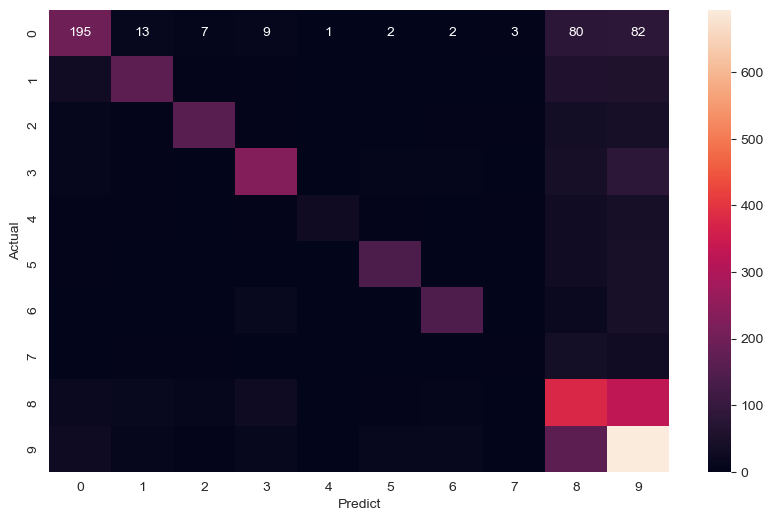

In [299]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(test['y'], y_pre, rownames=['Actual'], colnames=['Predict']), annot=True, fmt='d')
plt.show()


In [300]:
# predict 8,9 라벨만 추출
test['y'].value_counts()

y
9    935
8    786
0    394
3    387
1    325
2    261
6    223
5    222
4    122
7     82
Name: count, dtype: int64

In [301]:
test['y'].value_counts().index

Index([9, 8, 0, 3, 1, 2, 6, 5, 4, 7], dtype='int64', name='y')

In [302]:
# 8,9 라벨만 추출
test_89 = test[test['y'].isin([8,9])]


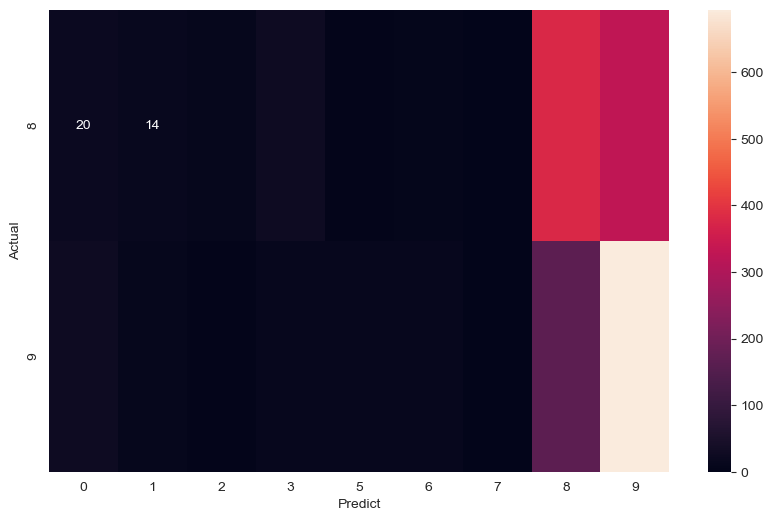

In [304]:
# 시각화
plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(test_89['y'], y_pre[test_89.index], rownames=['Actual'], colnames=['Predict']), annot=True, fmt='d')
plt.show()

In [305]:
# predict 8,9 라벨만 추출
test['y'].value_counts()


y
9    935
8    786
0    394
3    387
1    325
2    261
6    223
5    222
4    122
7     82
Name: count, dtype: int64

In [308]:
train['y'].value_counts()

y
9    3739
8    3143
0    1601
3    1556
1    1307
2    1057
6     895
5     888
4     488
7     331
Name: count, dtype: int64